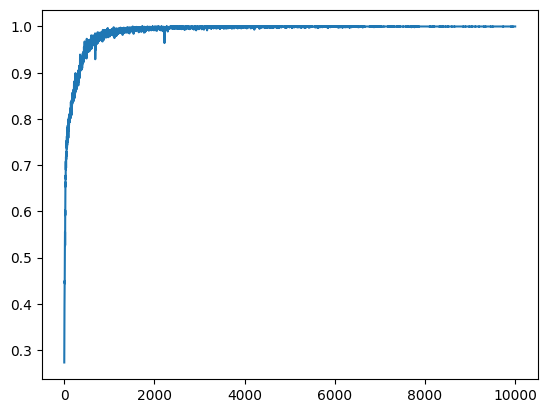

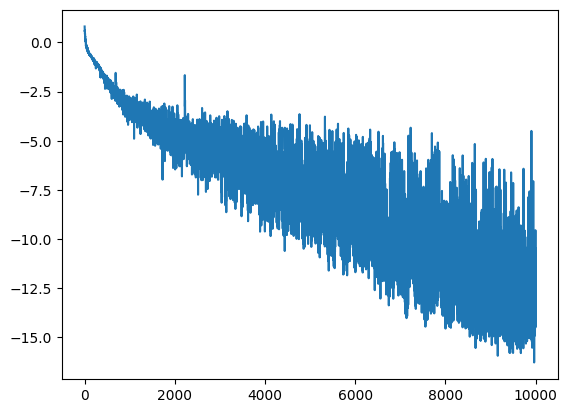

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path = "/root/app/competition_hist_0422_113858.csv"
df = pd.read_csv(path)

x = df["Epoch"]

y = df["Acc"]
plt.plot(x, y)
plt.show()

y = df["Loss"]
plt.plot(x, np.log(y))
plt.show()